In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st
import seaborn as sns
plt.style.use("seaborn")

C:\Users\shonn\AppData\Local\Temp\ipykernel_11116\2235473517.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [30]:
filepath = "BankChurners.csv"
df = pd.read_csv(filepath)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [31]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [32]:
#CLEANING THE DATA 

reduced_data = df.drop(columns=[
                           
                               "Total_Relationship_Count"
                                            ,'Contacts_Count_12_mon'
                                            ,"Dependent_count"
                                            ,"Months_Inactive_12_mon"
                                            ,'Total_Revolving_Bal'
                                            ,"CLIENTNUM"
                                      
                                            ,"Months_on_book" 
                                            ,"Total_Amt_Chng_Q4_Q1" 
                                            , "Total_Trans_Amt" 
                                            , "Total_Trans_Ct" 
                                            , "Total_Ct_Chng_Q4_Q1" 
                                            ,"Avg_Utilization_Ratio" 
                                            ,"Card_Category"
, 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
    ,'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
, 'Avg_Open_To_Buy'
])
reduced_data

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,Existing Customer,45,M,High School,Married,$60K - $80K,12691.0
1,Existing Customer,49,F,Graduate,Single,Less than $40K,8256.0
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,3418.0
3,Existing Customer,40,F,High School,Unknown,Less than $40K,3313.0
4,Existing Customer,40,M,Uneducated,Married,$60K - $80K,4716.0
...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,Graduate,Single,$40K - $60K,4003.0
10123,Attrited Customer,41,M,Unknown,Divorced,$40K - $60K,4277.0
10124,Attrited Customer,44,F,High School,Married,Less than $40K,5409.0
10125,Attrited Customer,30,M,Graduate,Unknown,$40K - $60K,5281.0


In [33]:

#renaming columns:
reduced_data = reduced_data.rename(columns={
                                           "Customer_Age": "Customer Age"
                                           
                                            , "Attrition_Flag" : "Attrition Flag"
                                            ,"Education_Level": "Education Level"
                                            ,"Marital_Status": "Marital Status"
                                            ,"Income_Category": "Income Category"
                                            
                                            ,"Credit_Limit" : "Credit Limit"
                                            
                                              })
reduced_data.head()

,Attrition Flag,Customer Age,Gender,Education Level,Marital Status,Income Category,Credit Limit
0,Existing Customer,45,M,High School,Married,$60K - $80K,12691.0
1,Existing Customer,49,F,Graduate,Single,Less than $40K,8256.0
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,3418.0
3,Existing Customer,40,F,High School,Unknown,Less than $40K,3313.0
4,Existing Customer,40,M,Uneducated,Married,$60K - $80K,4716.0


In [34]:
reduced_data.sample(5)
#reduced_data.columns

,Attrition Flag,Customer Age,Gender,Education Level,Marital Status,Income Category,Credit Limit
3574,Existing Customer,44,F,High School,Married,Less than $40K,4985.0
8698,Existing Customer,40,F,College,Divorced,$40K - $60K,9243.0
2554,Attrited Customer,33,M,Unknown,Married,$60K - $80K,8925.0
2911,Existing Customer,41,M,Uneducated,Divorced,$80K - $120K,34516.0
970,Existing Customer,49,F,College,Single,Unknown,16031.0


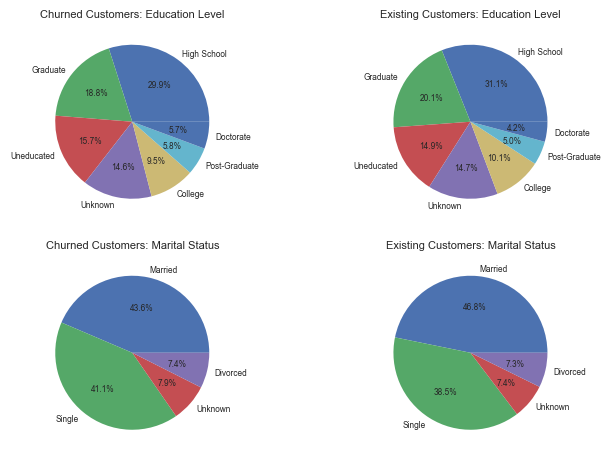

In [35]:
colors = ['yellowgreen','lightskyblue','lightcoral','blue',
          'pink', 'darkgreen','grey','violet','magenta','cyan']

#Creating Layout 
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2) # 4 rows, 2 columns 

#EXPLORATORY DATA ANALYSIS
# 8 Variables to analyze:
# Education Level 
# Gender 
# Income Range 
# Marital Status 
# Credit Limit
# Revolving Credit 
# Age
# Utilization Ratio

#Categorical Variables
# Education Level 
# Gender
# Marital Status
# Income Range

#Continuous Variables to Dimensionalize:
#Credit Limit 
#Revolving Credit
#Age 
#Utilization Ratio


#Education Level 


labels = reduced_data["Education Level"].unique()
#  attrited customers 
attrited_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Attrited Customer"]
attrited_education_level = attrited_df["Education Level"].value_counts()
ax1.pie(attrited_education_level, labels = labels, autopct='%1.1f%%',textprops={'fontsize':6})
ax1.set_title("Churned Customers: Education Level" ,fontsize = 8)
#existing customers 

existing_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Existing Customer"]
existing_education_level = existing_df["Education Level"].value_counts()
ax2.pie(existing_education_level, labels = labels, autopct='%1.1f%%', textprops={'fontsize':6})
ax2.set_title("Existing Customers: Education Level" ,fontsize = 8)



# Marital Status 

labels = reduced_data["Marital Status"].unique()

#fig, (ax1, ax2) = plt.subplots(1,2) # 1 row, 2 columns 
#  attrited customers 
attrited_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Attrited Customer"]
attrited_marital_status = attrited_df["Marital Status"].value_counts()
ax3.pie(attrited_marital_status, labels = labels, autopct='%1.1f%%', textprops={'fontsize':6} )
ax3.set_title("Churned Customers: Marital Status",fontsize = 8)
#existing customers 

existing_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Existing Customer"]
existing_marital_status = existing_df["Marital Status"].value_counts()
ax4.pie(existing_marital_status, labels = labels, autopct='%1.1f%%', textprops={'fontsize':6})
ax4.set_title("Existing Customers: Marital Status",fontsize = 8)


plt.show()



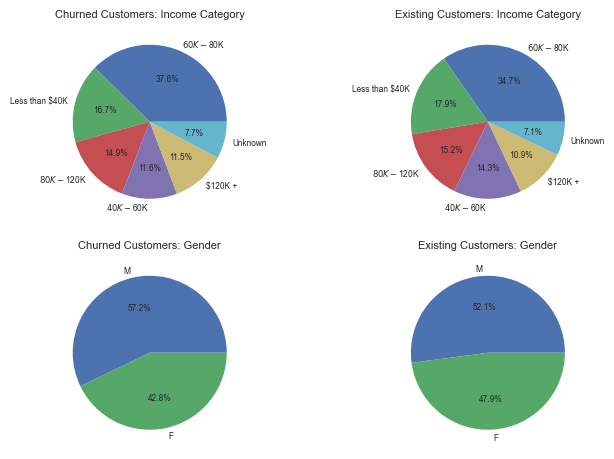

In [36]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
# Income Category 
labels = reduced_data["Income Category"].unique()

#  attrited customers 
attrited_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Attrited Customer"]
attrited_income_category = attrited_df["Income Category"].value_counts()
ax1.pie(attrited_income_category, labels = labels, autopct='%1.1f%%',textprops={'fontsize':6} )
ax1.set_title("Churned Customers: Income Category",fontsize = 8)
#existing customers 

existing_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Existing Customer"]
existing_income_category = existing_df["Income Category"].value_counts()
ax2.pie(existing_income_category, labels = labels, autopct='%1.1f%%',textprops={'fontsize':6})
ax2.set_title("Existing Customers: Income Category", fontsize = 8)


#Gender
labels = reduced_data["Gender"].unique()

#  attrited customers 
attrited_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Attrited Customer"]
attrited_card_category = attrited_df["Gender"].value_counts()
ax3.pie(attrited_card_category, labels = labels, autopct='%1.1f%%', textprops={'fontsize':6} )
ax3.set_title("Churned Customers: Gender", fontsize = 8)
#existing customers 

existing_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Existing Customer"]
existing_card_category = existing_df["Gender"].value_counts()
ax4.pie(existing_card_category, labels = labels, autopct='%1.1f%%',textprops={'fontsize':6})
ax4.set_title("Existing Customers: Gender", fontsize = 8)

plt.show()




In [37]:
reduced_data.sample(10)

,Attrition Flag,Customer Age,Gender,Education Level,Marital Status,Income Category,Credit Limit
1792,Existing Customer,58,M,High School,Married,$40K - $60K,7803.0
6443,Existing Customer,42,M,College,Single,$60K - $80K,11698.0
3214,Existing Customer,52,M,Unknown,Single,$60K - $80K,1629.0
5544,Existing Customer,53,F,Uneducated,Divorced,Less than $40K,2383.0
9312,Existing Customer,42,M,Graduate,Single,$60K - $80K,17887.0
2787,Existing Customer,47,F,Uneducated,Single,Unknown,16411.0
4600,Existing Customer,30,F,Uneducated,Single,Unknown,7536.0
9698,Attrited Customer,50,F,Graduate,Married,Less than $40K,4935.0
9189,Existing Customer,52,M,Uneducated,Unknown,$120K +,33552.0
9058,Existing Customer,43,M,Post-Graduate,Married,$60K - $80K,13553.0


In [442]:
#Continuous Variables to Dimensionalize:
#Credit Limit 
#Revolving Credit
#Age 
#Utilization Ratio

In [462]:
bins = 9
#creating the bins 
groups = [x for x in range(int(min_credit_limit),int(max_credit_limit*1.055),
                            int(((max_credit_limit*1.055) - min_credit_limit)/bins))]
print(groups)
#creating the labels 
labels = [ f'[{groups[index]} - {groups[index +1]})' for index in range(len(groups)-1)]

print(labels)



[1438, 5324, 9210, 13096, 16982, 20868, 24754, 28640, 32526, 36412]
['[1438 - 5324)', '[5324 - 9210)', '[9210 - 13096)', '[13096 - 16982)', '[16982 - 20868)', '[20868 - 24754)', '[24754 - 28640)', '[28640 - 32526)', '[32526 - 36412)']


C:\Users\shonn\AppData\Local\Temp\ipykernel_15972\2302290935.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrited_credit_limit["Credit Range"] = pd.cut(attrited_credit_limit["Credit Limit"],
C:\Users\shonn\AppData\Local\Temp\ipykernel_15972\2302290935.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  existing_credit_limit["Credit Range"] = pd.cut(existing_credit_limit["Credit Limit"],
C:\Users\shonn\AppData\Local\Temp\ipykernel_15972\2302290935.py:69: SettingWithCopyWarning: 
A value is trying t

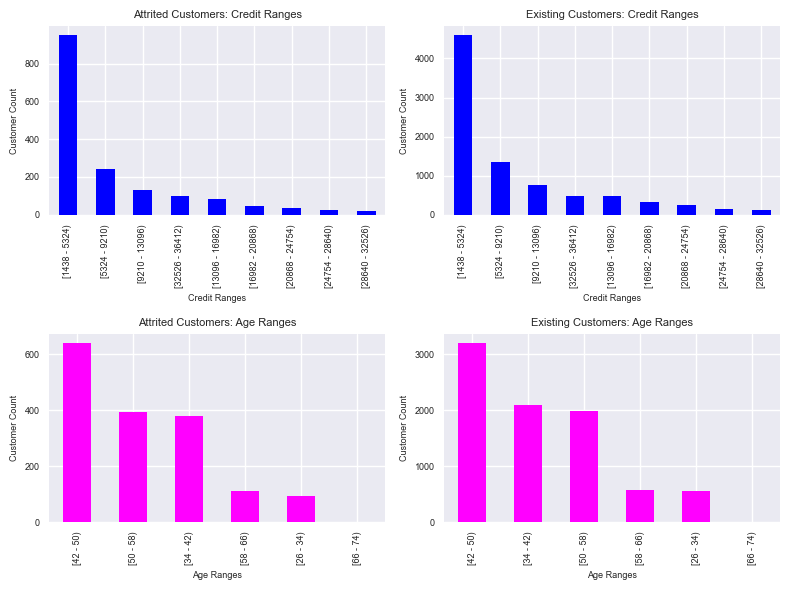

In [517]:
#creating subplots
fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=2)
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
ax4=plt.subplot(2,2,4)


#Creating bins and labels for Credit Limit 

    # get min and max:
min_credit_limit = attrited_df[["Credit Limit"]].min()
max_credit_limit = attrited_df[["Credit Limit"]].max()

#creating the bins 
bins = 9
groups = [x for x in range(int(min_credit_limit),int(max_credit_limit*1.055),
                            int(((max_credit_limit*1.055) - min_credit_limit)/bins))]
#print(groups)
#creating the labels 
labels = [ f'[{groups[index]} - {groups[index +1]})' for index in range(len(groups)-1)]

#print(labels)


#Credit Limit 
#Attrited Customers 
attrited_credit_limit = attrited_df[["Credit Limit"]]
attrited_credit_limit["Credit Range"] = pd.cut(attrited_credit_limit["Credit Limit"],
                                               groups, labels = labels)
a_credit_range = attrited_credit_limit["Credit Range"].value_counts()
a_credit_plot = a_credit_range.plot(kind = "bar", ax=axes[0,0],facecolor = 'b',figsize = (8,6), 
                                   fontsize = 6.5)
ax1.set_title("Attrited Customers: Credit Ranges", fontsize = 8)
ax1.set_xlabel('Credit Ranges',fontsize = 6.5)
ax1.set_ylabel('Customer Count',fontsize = 6.5)

#Existing Customers
existing_credit_limit = existing_df[["Credit Limit"]]
existing_credit_limit["Credit Range"] = pd.cut(existing_credit_limit["Credit Limit"],
                                               groups, labels = labels)
e_credit_range = existing_credit_limit["Credit Range"].value_counts()
e_credit_plot = e_credit_range.plot(kind = "bar", ax=axes[0,1],facecolor = 'b',figsize = (8,6) 
                                   ,fontsize = 6.5,)
ax2.set_title("Existing Customers: Credit Ranges", fontsize = 8)
ax2.set_xlabel('Credit Ranges',fontsize = 6.5)
ax2.set_ylabel('Customer Count',fontsize = 6.5)



#Age 
min_age = existing_df[["Customer Age"]].min()
max_age = existing_df[["Customer Age"]].max()



#creating the bins 
bins = 6
groups = [x for x in range(int(min_age),int(max_age*1.055),
                            int(((max_age*1.055) - min_age)/bins))]
#print(groups)
#creating the labels 
labels = [ f'[{groups[index]} - {groups[index +1]})' for index in range(len(groups)-1)]

#print(labels)

#Attrited Customers 
attrited_age= attrited_df[["Customer Age"]]
attrited_age["Age Range"] = pd.cut(attrited_age["Customer Age"],
                                               groups, labels = labels)
a_age_range = attrited_age["Age Range"].value_counts()
a_age_plot = a_age_range.plot(kind = "bar", ax=axes[1,0],facecolor = 'magenta',figsize = (8,6), 
                                   fontsize = 6.5)
ax3.set_title("Attrited Customers: Age Ranges", fontsize = 8)
ax3.set_xlabel('Age Ranges',fontsize = 6.5)
ax3.set_ylabel('Customer Count',fontsize = 6.5)

#Existing Customers
existing_age = existing_df[["Customer Age"]]
existing_age["Age Range"] = pd.cut(existing_age["Customer Age"],
                                               groups, labels = labels)
e_age_range = existing_age["Age Range"].value_counts()
e_age_plot = e_age_range.plot(kind = "bar", ax=axes[1,1],facecolor = 'magenta',figsize = (8,6) 
                                   ,fontsize = 6.5,)
ax4.set_title("Existing Customers: Age Ranges", fontsize = 8)
ax4.set_xlabel('Age Ranges',fontsize = 6.5)
ax4.set_ylabel('Customer Count',fontsize = 6.5)

plt.tight_layout() 
plt.show()





In [519]:
reduced_data.columns

Index(['Client ID', 'Attrition Flag', 'Customer Age', 'Gender',
       'Number of Dependents', 'Education Level', 'Marital Status',
       'Income Category', 'Card Category', 'Months on the Book',
       'Number of Products Customers Holds',
       'Number of Months Inactive in the Last 12 Months',
       'Number of Contacts in the last 12 mths', 'Credit Limit',
       'Total Revolving Balance', 'Total Amount Change (Q4/Q1)',
       'Total Transaction Amt (Last 12 mths)', 'Total Transaction Count',
       ' Total Count Change (Q4/Q1)', 'Average Utilization Ratio',
       'Credit Limit Range'],
      dtype='object')

In [562]:
min_ratio = existing_df[['Average Utilization Ratio']].min()
max_ratio = existing_df[['Average Utilization Ratio']].max()

#creating the bins 
bins = 11
# x = int(((max_ratio*1.055)- min_ratio))
# print(x)

groups = [round(x,2) for x in np.arange(int(min_ratio),int(max_ratio*1.55),
                           int(((max_ratio*1.55)- min_ratio))/bins)]
print(groups)

#creating the labels 
labels = [ f'[{groups[index]} - {groups[index +1]})' for index in range(len(groups)-1)]

print(labels)


[0.0, 0.09, 0.18, 0.27, 0.36, 0.45, 0.55, 0.64, 0.73, 0.82, 0.91]
['[0.0 - 0.09)', '[0.09 - 0.18)', '[0.18 - 0.27)', '[0.27 - 0.36)', '[0.36 - 0.45)', '[0.45 - 0.55)', '[0.55 - 0.64)', '[0.64 - 0.73)', '[0.73 - 0.82)', '[0.82 - 0.91)']


[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
['[0.0 - 0.1)', '[0.1 - 0.2)', '[0.2 - 0.30000000000000004)', '[0.30000000000000004 - 0.4)', '[0.4 - 0.5)', '[0.5 - 0.6000000000000001)', '[0.6000000000000001 - 0.7000000000000001)', '[0.7000000000000001 - 0.8)', '[0.8 - 0.9)']


C:\Users\shonn\AppData\Local\Temp\ipykernel_15972\497726863.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrited_ratio["Ranges"] = pd.cut(attrited_ratio['Average Utilization Ratio'],
C:\Users\shonn\AppData\Local\Temp\ipykernel_15972\497726863.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  existing_credit_limit["Ranges"] = pd.cut(existing_credit_limit['Average Utilization Ratio'],


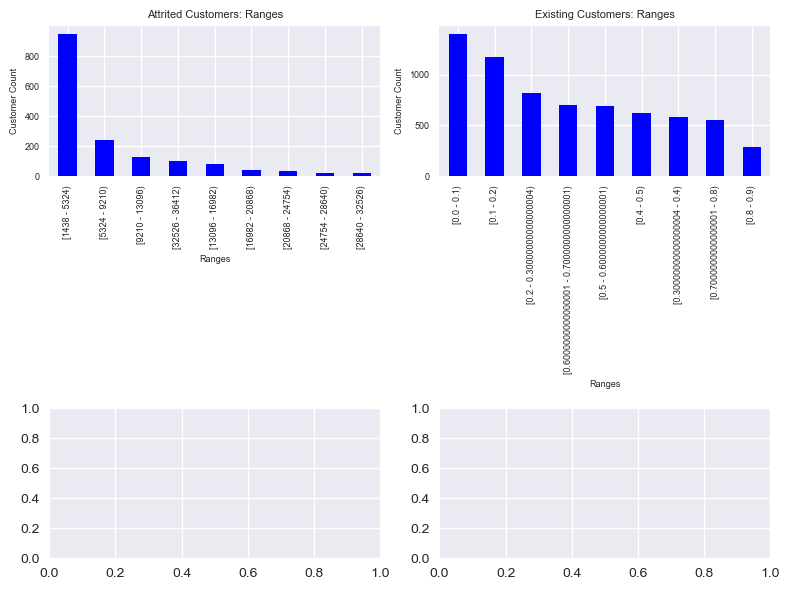

In [555]:
#creating subplots
fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=2)
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
ax4=plt.subplot(2,2,4)


#Creating bins and labels for 'Average Utilization Ratio'
    # get min and max:
min_ratio = existing_df[['Average Utilization Ratio']].min()
max_ratio = existing_df[['Average Utilization Ratio']].max()

#creating the bins 
bins = 10
# x = int(((max_ratio*1.055)- min_ratio))
# print(x)

groups = [x for x in np.arange(int(min_ratio),int(max_ratio*1.055),
                           int(((max_ratio*1.055)- min_ratio))/bins)]
print(groups)
#creating the labels 
labels = [ f'[{groups[index]} - {groups[index +1]})' for index in range(len(groups)-1)]

print(labels)

#Credit Limit 
#Attrited Customers 
attrited_ratio = attrited_df[['Average Utilization Ratio']]
attrited_ratio["Ranges"] = pd.cut(attrited_ratio['Average Utilization Ratio'],
                                               groups, labels = labels)
a_ratio = attrited_ratio["Ranges"].value_counts()
a_ratio = a_credit_range.plot(kind = "bar", ax=axes[0,0],facecolor = 'b',figsize = (8,6), 
                                   fontsize = 6.5)
ax1.set_title("Attrited Customers: Ranges", fontsize = 8)
ax1.set_xlabel('Ranges',fontsize = 6.5)
ax1.set_ylabel('Customer Count',fontsize = 6.5)

#Existing Customers
existing_credit_limit = existing_df[['Average Utilization Ratio']]
existing_credit_limit["Ranges"] = pd.cut(existing_credit_limit['Average Utilization Ratio'],
                                               groups, labels = labels)
e_credit_range = existing_credit_limit["Ranges"].value_counts()
e_credit_plot = e_credit_range.plot(kind = "bar", ax=axes[0,1],facecolor = 'b',figsize = (8,6) 
                                   ,fontsize = 6.5,)
ax2.set_title("Existing Customers: Ranges", fontsize = 8)
ax2.set_xlabel('Ranges',fontsize = 6.5)
ax2.set_ylabel('Customer Count',fontsize = 6.5)





# #Age 
# min_age = existing_df[['Average Utilization Ratio']].min()
# max_age = existing_df[["Customer Age"]].max()



# #creating the bins 
# bins = 6
# groups = [x for x in range(int(min_age),int(max_age*1.055),
#                             int(((max_age*1.055) - min_age)/bins))]
# #print(groups)
# #creating the labels 
# labels = [ f'[{groups[index]} - {groups[index +1]})' for index in range(len(groups)-1)]

# #print(labels)

# #Attrited Customers 
# attrited_age= attrited_df[["Customer Age"]]
# attrited_age["Age Range"] = pd.cut(attrited_age["Customer Age"],
#                                                groups, labels = labels)
# a_age_range = attrited_age["Age Range"].value_counts()
# a_age_plot = a_age_range.plot(kind = "bar", ax=axes[1,0],facecolor = 'magenta',figsize = (8,6), 
#                                    fontsize = 6.5)
# ax3.set_title("Attrited Customers: Age Ranges", fontsize = 8)
# ax3.set_xlabel('Age Ranges',fontsize = 6.5)
# ax3.set_ylabel('Customer Count',fontsize = 6.5)

# #Existing Customers
# existing_age = existing_df[["Customer Age"]]
# existing_age["Age Range"] = pd.cut(existing_age["Customer Age"],
#                                                groups, labels = labels)
# e_age_range = existing_age["Age Range"].value_counts()
# e_age_plot = e_age_range.plot(kind = "bar", ax=axes[1,1],facecolor = 'magenta',figsize = (8,6) 
#                                    ,fontsize = 6.5,)
# ax4.set_title("Existing Customers: Age Ranges", fontsize = 8)
# ax4.set_xlabel('Age Ranges',fontsize = 6.5)
# ax4.set_ylabel('Customer Count',fontsize = 6.5)

plt.tight_layout() 
plt.show()





In [406]:
# MEAN - MEDIAN - MODE Numberical Variables 
numerical_variable = ['Customer Age','Number of Dependents','Months on the Book'
                     ,'Number of Products Customers Holds'
                     ,'Number of Months Inactive in the Last 12 Months'
                     , 'Number of Contacts in the last 12 mths'
                      ,'Credit Limit','Total Revolving Balance','Total Amount Change (Q4/Q1)'
                     , 'Total Transaction Amt (Last 12 mths)','Total Transaction Count'
                     , ' Total Count Change (Q4/Q1)', 'Average Utilization Ratio']
      
for index in range(len(numerical_variable)):
    mean = reduced_data[numerical_variable[index]].mean()
    median = reduced_data[numerical_variable[index]].median()
    mode = st.mode(reduced_data[numerical_variable[index]])
    print(f"{numerical_variable[index]}:  {mean}, {median}, {mode}")


Customer Age:  46.32596030413745, 46.0, ModeResult(mode=array([44], dtype=int64), count=array([500]))
Number of Dependents:  2.3462032191172115, 2.0, ModeResult(mode=array([3], dtype=int64), count=array([2732]))
Months on the Book:  35.928409203120374, 36.0, ModeResult(mode=array([36], dtype=int64), count=array([2463]))
Number of Products Customers Holds:  3.8125802310654686, 4.0, ModeResult(mode=array([3], dtype=int64), count=array([2305]))
Number of Months Inactive in the Last 12 Months:  2.3411671768539546, 2.0, ModeResult(mode=array([3], dtype=int64), count=array([3846]))
Number of Contacts in the last 12 mths:  2.4553174681544387, 2.0, ModeResult(mode=array([3], dtype=int64), count=array([3380]))
Credit Limit:  8631.953698034955, 4549.0, ModeResult(mode=array([34516.]), count=array([508]))
Total Revolving Balance:  1162.8140614199665, 1276.0, ModeResult(mode=array([0], dtype=int64), count=array([2470]))
Total Amount Change (Q4/Q1):  0.7599406536980349, 0.736, ModeResult(mode=array

C:\Users\shonn\AppData\Local\Temp\ipykernel_15972\1142671859.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(reduced_data[numerical_variable[index]])
